# Concatenate TCGA MAF Files
This notebook loads all the MAF files downloaded from the TCGA data portal and joins them. Duplicates are removed prior to analyzing the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

%matplotlib inline

## Joining all MAF Files
First, let's try to read all the MAF files and concatenate them. After that, I should be left with one big MAF that I can write to file.

In [20]:
count = 0
maf_all = None
col_names = None
root_dir = '../../data/pancancer/TCGA/mutation/download_new/'
for subdir, d, files in os.walk(root_dir):
    for fname in files:
        if fname.endswith('.maf'):
            p = os.path.join(subdir, fname)
            if maf_all is None:
                maf_all = pd.read_csv(p, sep='\t', comment='#', header=0)
                col_names = maf_all.columns
            else:
                print ("[{}] Got {} mutations and {} common columns".format(count, maf_all.shape[0], maf_all.shape[1]))
                try:
                    maf_new = pd.read_csv(p, sep='\t', comment='#', header=0)
                except:
                    print ("Exception occured while reading {}... Skipping!".format(p))
                    continue
                if {'Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode'}.issubset(maf_new.columns):
                    maf_join = pd.concat([maf_all, maf_new], ignore_index=True, join='inner')
                    maf_join.dropna(axis=1, inplace=True, how='all') # remove stupid all-na columns
                    if len(maf_join.columns) < len(col_names):
                        print ("Lost {} columns reading {}".format(len(col_names)-maf_join.shape[1], p))
                        print ("Lost columns: {}".format([c for c in col_names if not c in maf_join.columns]))
                        print ("New Maf cols: {}".format(maf_new.columns))
                        print ("Old MAF cols: {}".format(maf_all.columns))
                        print ("Join MAF cols: {}".format(maf_join.columns))
                        col_names = maf_all.columns
                    maf_all = maf_join
                else:
                    print ("File contains not all columns needed or is empty {}".format(p))
            count += 1
count

/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[1] Got 64804 mutations and 120 common columns


/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,88,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lost 18 columns reading ../../data/pancancer/TCGA/mutation/download_new/c06465a3-50e7-46f7-b2dd-7bd654ca206b/TCGA.STAD.mutect.c06465a3-50e7-46f7-b2dd-7bd654ca206b.DR-10.0.somatic.maf
Lost columns: ['Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2', 'Match_Norm_Validation_Allele1', 'Match_Norm_Validation_Allele2', 'Verification_Status', 'Validation_Status', 'Sequencing_Phase', 'Sequence_Source', 'Score', 'BAM_File', 'n_ref_count', 'n_alt_count', 'ASN_MAF', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'GENE_PHENO']
New Maf cols: Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Variant_Classification',
       'Variant_Type',
       ...
       'FILTER', 'CONTEXT', 'src_vcf_id', 'tumor_bam_uuid', 'normal_bam_uuid',
       'case_id', 'GDC_FILTER', 'COSMIC', 'MC3_Overlap',
       'GDC_Validation_Status'],
      dtype='object', length=120)
Old MAF cols: Index(['Hugo_Symbol', 'Entrez_Gene_Id', 

/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,88,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Lost 18 columns reading ../../data/pancancer/TCGA/mutation/download_new/0458c57f-316c-4a7c-9294-ccd11c97c2f9/TCGA.LUAD.mutect.0458c57f-316c-4a7c-9294-ccd11c97c2f9.DR-10.0.somatic.maf
Lost columns: ['Match_Norm_Seq_Allele1', 'Match_Norm_Seq_Allele2', 'Match_Norm_Validation_Allele1', 'Match_Norm_Validation_Allele2', 'Verification_Status', 'Validation_Status', 'Sequencing_Phase', 'Sequence_Source', 'Score', 'BAM_File', 'n_ref_count', 'n_alt_count', 'ASN_MAF', 'MOTIF_NAME', 'MOTIF_POS', 'HIGH_INF_POS', 'MOTIF_SCORE_CHANGE', 'GENE_PHENO']
New Maf cols: Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Variant_Classification',
       'Variant_Type',
       ...
       'FILTER', 'CONTEXT', 'src_vcf_id', 'tumor_bam_uuid', 'normal_bam_uuid',
       'case_id', 'GDC_FILTER', 'COSMIC', 'MC3_Overlap',
       'GDC_Validation_Status'],
      dtype='object', length=120)
Old MAF cols: Index(['Hugo_Symbol', 'Entrez_Gene_Id', 

/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,20,28,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[4] Got 589533 mutations and 102 common columns


/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[5] Got 634846 mutations and 102 common columns
Exception occured while reading ../../data/pancancer/TCGA/mutation/download_new/d3fa70be-520a-420e-bb6d-651aeee5cb50/TCGA.UCEC.mutect.d3fa70be-520a-420e-bb6d-651aeee5cb50.DR-10.0.somatic.maf... Skipping!
[5] Got 634846 mutations and 102 common columns
[6] Got 755834 mutations and 102 common columns


/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (88,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[7] Got 810072 mutations and 102 common columns
[8] Got 833837 mutations and 102 common columns
[9] Got 1098623 mutations and 102 common columns
[10] Got 1279739 mutations and 102 common columns


/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[11] Got 1382048 mutations and 102 common columns


/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (88,98) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


[12] Got 1392947 mutations and 102 common columns
[13] Got 1527460 mutations and 102 common columns
[14] Got 1554153 mutations and 102 common columns


15

In [4]:
maf_all.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,C1orf94,84970,BCM,GRCh38,chr1,34218878,34218878,+,3'UTR,SNP,...,PASS,GGTCACAGACA,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,NaN,True,Unknown
1,MACF1,23499,BCM,GRCh38,chr1,39357837,39357837,+,Missense_Mutation,SNP,...,PASS,GAAACTTAGTA,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM288283;COSM288284,True,Unknown
2,GBP5,115362,BCM,GRCh38,chr1,89260749,89260749,+,Silent,SNP,...,PASS,TGGGCGTGCTG,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM288277,True,Unknown
3,ZNF326,284695,BCM,GRCh38,chr1,90007501,90007501,+,Silent,SNP,...,PASS,TCTTTCGGAGG,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM288313,True,Unknown
4,BRDT,676,BCM,GRCh38,chr1,91977358,91977358,+,Missense_Mutation,SNP,...,PASS,ATGACGTTGTC,a6945d7d-472c-4da7-a122-de6d014564e9,12f0b883-900e-41b4-bbdf-a66b96e825ca,8d36e3fc-bd2c-441d-a4e1-ed7c94d2cb3e,e6827400-0d95-46b0-8874-6ce9e9d5011b,wga_pair,COSM171492,True,Unknown


In [61]:
maf_shortened = maf_all[['Hugo_Symbol', 'Tumor_Sample_Barcode', 'Chromosome', 'Start_Position',
                         'End_Position', 'Variant_Classification', 'Reference_Allele',
                         'Tumor_Seq_Allele2']]
maf_shortened.columns = ['Gene', 'Tumor_Sample', 'Chromosome', 'Start_Position', 'End_Position',
                         'Variant_Classification', 'Reference_Allele', 'Tumor_Allele']
maf_shortened['Gene'] = maf_shortened.Gene.str.strip()
maf_shortened.set_index('Gene', inplace=True)
trim_barcode_to_patient = lambda x: '-'.join(str(x).split('-')[:3]) # TCGA barcode until patient
maf_shortened.loc[:, 'Tumor_Sample'] = maf_shortened.Tumor_Sample.map(trim_barcode_to_patient)
#maf_shortened.to_csv('../../data/pancancer/TCGA/mutation/pancan_maf/pancancer_16_onlyrequiredcols.maf', sep='\t')

/pkg/python-3.7.7-0/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/pkg/python-3.7.7-0/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [27]:
maf_all.Tumor_Sample_Barcode = maf_all.Tumor_Sample_Barcode.map(trim_barcode_to_patient)
maf_all.to_csv('../../data/pancancer/TCGA/mutation/pancan_maf/pancancer_16_samecols.maf', sep='\t')

In [4]:
verification = pd.read_csv('../../../2020plus-1.2.3/data/pancancer_16_hg19.maf', sep='\t', comment='#', header=0)
verification.Gene.nunique()

/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,5,6,17,18,19,20,21,22,23,24,26,27,28,29,30,39,40,41,42,43,44,58,59,60,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,94,96,97,98,99,100,101,102,103,104,105,106,107,108,109,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


21766

In [5]:
maf_shortened = verification[['Hugo_Symbol', 'Tumor_Sample_Barcode', 'Chromosome', 'Start_Position',
                         'End_Position', 'Variant_Classification', 'Reference_Allele',
                         'Tumor_Seq_Allele2']]
maf_shortened.columns = ['Gene', 'Tumor_Sample', 'Chromosome', 'Start_Position', 'End_Position',
                         'Variant_Classification', 'Reference_Allele', 'Tumor_Allele']
maf_shortened['Gene'] = maf_shortened.Gene.str.strip()
maf_shortened.set_index('Gene', inplace=True)
trim_barcode_to_patient = lambda x: '-'.join(str(x).split('-')[:3]) # TCGA barcode until patient
maf_shortened.loc[:, 'Tumor_Sample'] = maf_shortened.Tumor_Sample.map(trim_barcode_to_patient)
#maf_shortened.to_csv('../../data/pancancer/TCGA/mutation/pancan_maf/STAD_onlyrequiredcols.maf', sep='\t')

/pkg/python-3.7.7-0/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/pkg/python-3.7.7-0/lib/python3.7/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [26]:
maf_shortened.to_csv('/project/gcn/2020plus-1.2.3/data/pancancer_16_short_hg19.maf', sep='\t')

In [25]:
maf_shortened = maf_shortened.drop('Hugo_Symbol')

Gene
C1orf94     34684479
MACF1       39823509
GBP5        89726432
ZNF326      90473060
BRDT        92442915
             ...    
GLRA2       14599376
PHKA2       18912456
CYBB        37641374
AWAT1       69458062
AFF2       147733566
Name: Start_Position, Length: 2469673, dtype: int64

In [8]:
oncogenes = pd.read_csv('../../../2020plus-1.2.3/data/gene_lists/oncogenes.txt', header=None)
tsgs = pd.read_csv('../../../2020plus-1.2.3/data/gene_lists/tsgs.txt', header=None)
oncogenes.columns = ['Name']
tsgs.columns = ['Name']
verification[verification.Gene.isin(tsgs.Name)].Gene.value_counts()#, verification[verification.Gene.isin(oncogenes.Name)].Gene.nunique()

TP53       2883
KMT2D      1343
APC        1197
KMT2C      1110
ARID1A      981
           ... 
SMARCB1     105
GATA1        89
NPM1         68
CEBPA        28
SOCS1        24
Name: Gene, Length: 71, dtype: int64

In [20]:
print ("Collected MAF file with mutations from {} patients".format(maf_shortened.Tumor_Sample.nunique()))

Collected MAF file with mutations from 6909 patients


In [21]:
maf_shortened.Variant_Classification.value_counts()

Missense_Mutation         1252240
Silent                     461766
3'UTR                      218245
Intron                     113019
Nonsense_Mutation          107922
Frame_Shift_Del             77033
5'UTR                       52744
RNA                         44178
Frame_Shift_Ins             35047
Splice_Site                 31509
Splice_Region               23981
3'Flank                     22011
5'Flank                     15535
In_Frame_Ins                 5861
In_Frame_Del                 5349
Translation_Start_Site       1605
Nonstop_Mutation             1441
IGR                           330
Name: Variant_Classification, dtype: int64

In [10]:
variant_snv = ['Missense_Mutation', 'Silent', 'Nonsense_Mutation',
               'Splice_Site', 'Nonstop_Mutation', 'Translation_Start_Site']
maf_shortened.shape[0] - maf_shortened[maf_shortened.Variant_Classification.isin(variant_snv)].shape[0]

613333

## Do Some Preprocessing
After I now have one big DataFrame with all the MAF files concatenated, I want to clean it a little.

I will do the following:
* Remove all mutations without `Hugo_Symbol`. Mutations that are not in genes can't help me to compute mutation frequencies.
* Remove duplicated rows. If a mutation is an exact duplicate of another, remove it.

In [78]:
maf_no_nas = maf_all.loc[~maf_all.Hugo_Symbol.isnull()]

In [75]:
no_mut_dup = maf_no_nas.shape[0]
maf_no_nas.drop_duplicates(subset=['Hugo_Symbol', 'Variant_Classification', 'Tumor_Sample_Barcode'], inplace=True)
print ("Joined MAF contained {} duplicates. Left with {} out of {} mutations".format(no_mut_dup-maf_no_nas.shape[0],
                                                                                  maf_no_nas.shape[0], no_mut_dup))

Joined MAF contained 1859965 duplicates. Left with 1864774 out of 3724739 mutations


/pkg/python-3.6.0-0/lib/python3.6/site-packages/pandas/util/decorators.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


In [17]:
test_file = '../../data/pancancer/TCGA/mutation/download_new/c06465a3-50e7-46f7-b2dd-7bd654ca206b/TCGA.STAD.mutect.c06465a3-50e7-46f7-b2dd-7bd654ca206b.DR-10.0.somatic.maf'
test = pd.read_csv(test_file, sep='\t', comment='#', header=0)
test.head()

/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,88,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,FILTER,CONTEXT,src_vcf_id,tumor_bam_uuid,normal_bam_uuid,case_id,GDC_FILTER,COSMIC,MC3_Overlap,GDC_Validation_Status
0,C1orf86,199990,BI,GRCh38,chr1,2193894,2193894,+,Frame_Shift_Del,DEL,...,PASS,GGCTCCGGGCCG,b06a171d-e6f1-4f81-b9e3-e5e4522ccf5d,003d6bd5-3ae8-4838-8cfc-0355ee16122d,b4ede00d-9733-4eb2-9335-c7bcd7976d2e,ec02b33c-8094-45e8-b679-b14dbe75d66f,NaN,NaN,True,Unknown
1,ERRFI1,54206,BI,GRCh38,chr1,8013618,8013618,+,Silent,SNP,...,panel_of_normals,TTACTCGGTGA,b06a171d-e6f1-4f81-b9e3-e5e4522ccf5d,003d6bd5-3ae8-4838-8cfc-0355ee16122d,b4ede00d-9733-4eb2-9335-c7bcd7976d2e,ec02b33c-8094-45e8-b679-b14dbe75d66f,gdc_pon,COSM3492653,True,Unknown
2,CLCN6,1185,BI,GRCh38,chr1,11833961,11833961,+,Missense_Mutation,SNP,...,PASS,TCCAAGTGGCC,b06a171d-e6f1-4f81-b9e3-e5e4522ccf5d,003d6bd5-3ae8-4838-8cfc-0355ee16122d,b4ede00d-9733-4eb2-9335-c7bcd7976d2e,ec02b33c-8094-45e8-b679-b14dbe75d66f,NaN,COSM4021197,True,Unknown
3,PRAMEF1,65121,BI,GRCh38,chr1,12795592,12795592,+,Missense_Mutation,SNP,...,panel_of_normals,CCCTCGGAGCT,b06a171d-e6f1-4f81-b9e3-e5e4522ccf5d,003d6bd5-3ae8-4838-8cfc-0355ee16122d,b4ede00d-9733-4eb2-9335-c7bcd7976d2e,ec02b33c-8094-45e8-b679-b14dbe75d66f,gdc_pon,COSM4021467;COSM4021468;COSM4021469,True,Unknown
4,PRAMEF18,391003,BI,GRCh38,chr1,13225284,13225284,+,Missense_Mutation,SNP,...,PASS,TCAAGGGCTGC,b06a171d-e6f1-4f81-b9e3-e5e4522ccf5d,003d6bd5-3ae8-4838-8cfc-0355ee16122d,b4ede00d-9733-4eb2-9335-c7bcd7976d2e,ec02b33c-8094-45e8-b679-b14dbe75d66f,NaN,NaN,False,Unknown


In [44]:
maf_shortened = test[['Hugo_Symbol', 'Tumor_Sample_Barcode', 'Chromosome', 'Start_Position',
                         'End_Position', 'Variant_Classification', 'Reference_Allele',
                         'Tumor_Seq_Allele2']]
maf_shortened.columns = ['Gene', 'Tumor_Sample', 'Chromosome', 'Start_Position', 'End_Position',
                         'Variant_Classification', 'Reference_Allele', 'Tumor_Allele']
maf_shortened['Gene'] = maf_shortened.Gene.str.strip()
maf_shortened.set_index('Gene', inplace=True)
trim_barcode_to_patient = lambda x: '-'.join(str(x).split('-')[:3]) # TCGA barcode until patient
maf_shortened.loc[:, 'Tumor_Sample'] = maf_shortened.Tumor_Sample.map(trim_barcode_to_patient)
maf_shortened['Tumor_Type'] = 'Stomach Adenocarcinoma'
#maf_shortened.to_csv('../../data/pancancer/TCGA/mutation/pancan_maf/STAD_onlyrequiredcols.maf', sep='\t')

/pkg/python-3.7.7-0/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/pkg/python-3.7.7-0/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


TTN      835
MUC16    314
Name: Gene, dtype: int64

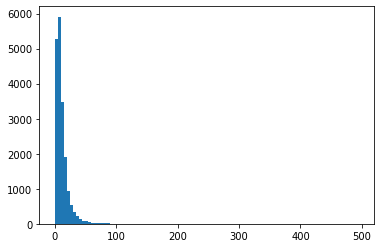

In [45]:
plt.hist(maf_shortened.index.value_counts(), bins=np.arange(0, 500, 5))
t = maf_shortened.index.value_counts()
t[t >= 300]

In [88]:
test2 = pd.read_csv('/project/gcn/2020plus-1.2.3/data/mutations.txt', sep='\t')
test2['Gene'] = test2.Gene.str.strip()
test2.set_index('Gene', inplace=True)
test2.drop('Protein_Change', axis=1, inplace=True)

In [89]:
test2.Variant_Classification.value_counts()

Missense_Mutation           465597
Silent                      177737
Nonsense_Mutation            34194
Splice_Site                  24459
Frame_Shift_Indel            18691
In_Frame_Indel                4456
Promoter                      3004
Translation_Start_Site         497
Nonstop_Mutation               276
Splice_Region                  132
De_novo_Start_OutOfFrame        82
NCSD                            29
miRNA                           22
De_novo_Start_InFrame           16
downstream                       5
upstream                         3
De_novo_Start                    2
upstream;downstream              1
Read-through                     1
Start_Codon_Del                  1
Name: Variant_Classification, dtype: int64

In [90]:
test2.head()

,Tumor_Sample,Tumor_Type,Chromosome,Start_Position,End_Position,Variant_Classification,Reference_Allele,Tumor_Allele
Gene,,,,,,,,
IVL,BR-0001,Breast Adenocarcinoma,chr1,152883016,152883016,Missense_Mutation,A,G
ZBTB37,BR-0001,Breast Adenocarcinoma,chr1,173837392,173837392,Splice_Site,AGGCA,-
CHIT1,BR-0001,Breast Adenocarcinoma,chr1,203191404,203191404,Missense_Mutation,C,T
DRD5,BR-0001,Breast Adenocarcinoma,chr4,9784617,9784617,Missense_Mutation,T,C
GRM4,BR-0001,Breast Adenocarcinoma,chr6,34100851,34100852,Frame_Shift_Indel,-,G


In [91]:
test2.to_csv('/project/gcn/2020plus-1.2.3/data/bladder_redone.txt', sep='\t')

In [62]:
bed = pd.read_csv('/project/gcn/2020plus-1.2.3/data/snvboxGenes.bed', sep='\t', header=None)
bed = bed.iloc[:, :4]
bed.columns = ['Chr', 'Start', 'End', 'Gene']
maf_shortened[maf_shortened.index.isin(bed.Gene)].shape

(2385673, 7)

In [63]:
maf_shortened.shape

(2469816, 7)

In [64]:
summary_test = pd.read_csv('/project/gcn/2020plus-1.2.3/summary_test.txt', sep='\t')

In [79]:
maf_all['NCBI_Build'].unique()

array(['GRCh38'], dtype=object)

In [81]:
x = pd.read_csv('/project/gcn/2020plus-1.2.3/data/bladder_redone.txt', sep='\t')

In [82]:
x.head()

,Gene,Tumor_Sample,Tumor_Type,Chromosome,Start_Position,End_Position,Variant_Classification,Reference_Allele,Tumor_Allele,Protein_Change
0,IVL,BR-0001,Breast Adenocarcinoma,chr1,152883016,152883016,Missense_Mutation,A,G,p.Q248R
1,ZBTB37,BR-0001,Breast Adenocarcinoma,chr1,173837392,173837392,Splice_Site,AGGCA,-,p.?
2,CHIT1,BR-0001,Breast Adenocarcinoma,chr1,203191404,203191404,Missense_Mutation,C,T,p.E219K
3,DRD5,BR-0001,Breast Adenocarcinoma,chr4,9784617,9784617,Missense_Mutation,T,C,p.C322R
4,GRM4,BR-0001,Breast Adenocarcinoma,chr6,34100851,34100852,Frame_Shift_Indel,-,G,p.K141fs*


In [104]:
maf_shortened[maf_shortened.index == 'APC'].Start_Position.max()

112845445

In [103]:
test2[test2.index == 'APC'].Start_Position.max()

112179759

In [102]:
bed[bed.Gene == 'APC']

,Chr,Start,End,Gene
789,chr5,112073555,112181936,APC


In [2]:
count = 0
maf_all = None
col_names = None
root_dir = '../../data/pancancer/TCGA/mutation/download_new/'
for subdir, d, files in os.walk(root_dir):
    for fname in files:
        if fname.endswith('.maf'):
            p = os.path.join(subdir, fname)
            if maf_all is None:
                maf_all = pd.read_csv(p, sep='\t', comment='#', header=0)
            else:
                maf_new = pd.read_csv(p, sep='\t', comment='#', header=0)
                maf_join = pd.concat([maf_all, maf_new], ignore_index=True, join='inner')
                maf_join.dropna(axis=1, inplace=True, how='all') # remove stupid all-na columns
                maf_all = maf_join
            count += 1
count

/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,88,98,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (87,88,118) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/pkg/python-3.7.7-0/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19,20,28,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=inter

16

In [117]:
bed_maf = maf_shortened[['Chromosome', 'Start_Position', 'End_Position',
                         'Tumor_Sample', 'Variant_Classification',
                         'Reference_Allele', 'Tumor_Allele']]
bed_maf['Gene'] = bed_maf.index
bed_maf.set_index('Chromosome', inplace=True)
bed_maf.to_csv('/project/gcn/UCSCliftover/maf_bed_pancan16.maf', sep='\t', header=None)

/pkg/python-3.7.7-0/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [118]:
bed_maf.shape

(2469816, 7)